## - 불러올 패키지 목록

In [1]:
# 수학 함수 패키지
import math

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.formula.api import *
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# 데이터 확인 및 전처리

## 데이터프레임 생성

In [2]:
df_bike = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\bike_train.csv')
df_bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## 데이터 정보 확인

In [3]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## 날짜 데이터 전처리

### object 타입의 데이터를 datetime64 타입으로 변환

In [4]:
df_bike['datetime'] = df_bike['datetime'].apply(pd.to_datetime)
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


### datetime64 타입의 데이터에서 년, 월, 일, 시간 별로 추출하여 컬럼 지정 및 저장

In [5]:
df_bike['year'] = df_bike.datetime.dt.year
df_bike['month'] = df_bike.datetime.dt.month
df_bike['day'] = df_bike.datetime.dt.day
df_bike['hour'] = df_bike.datetime.dt.hour

df_bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


## 불필요한 컬럼 삭제

In [6]:
df_bike = df_bike.drop(['datetime', 'casual', 'registered'], axis=1 )
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


## 데이터 분포 확인

In [7]:
df_bike.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
count,10886.0,191.574132,181.144454,1.00,42.0000,145.000,284.0000,977.0000
year,10886.0,2011.501929,0.500019,2011.00,2011.0000,2012.000,2012.0000,2012.0000


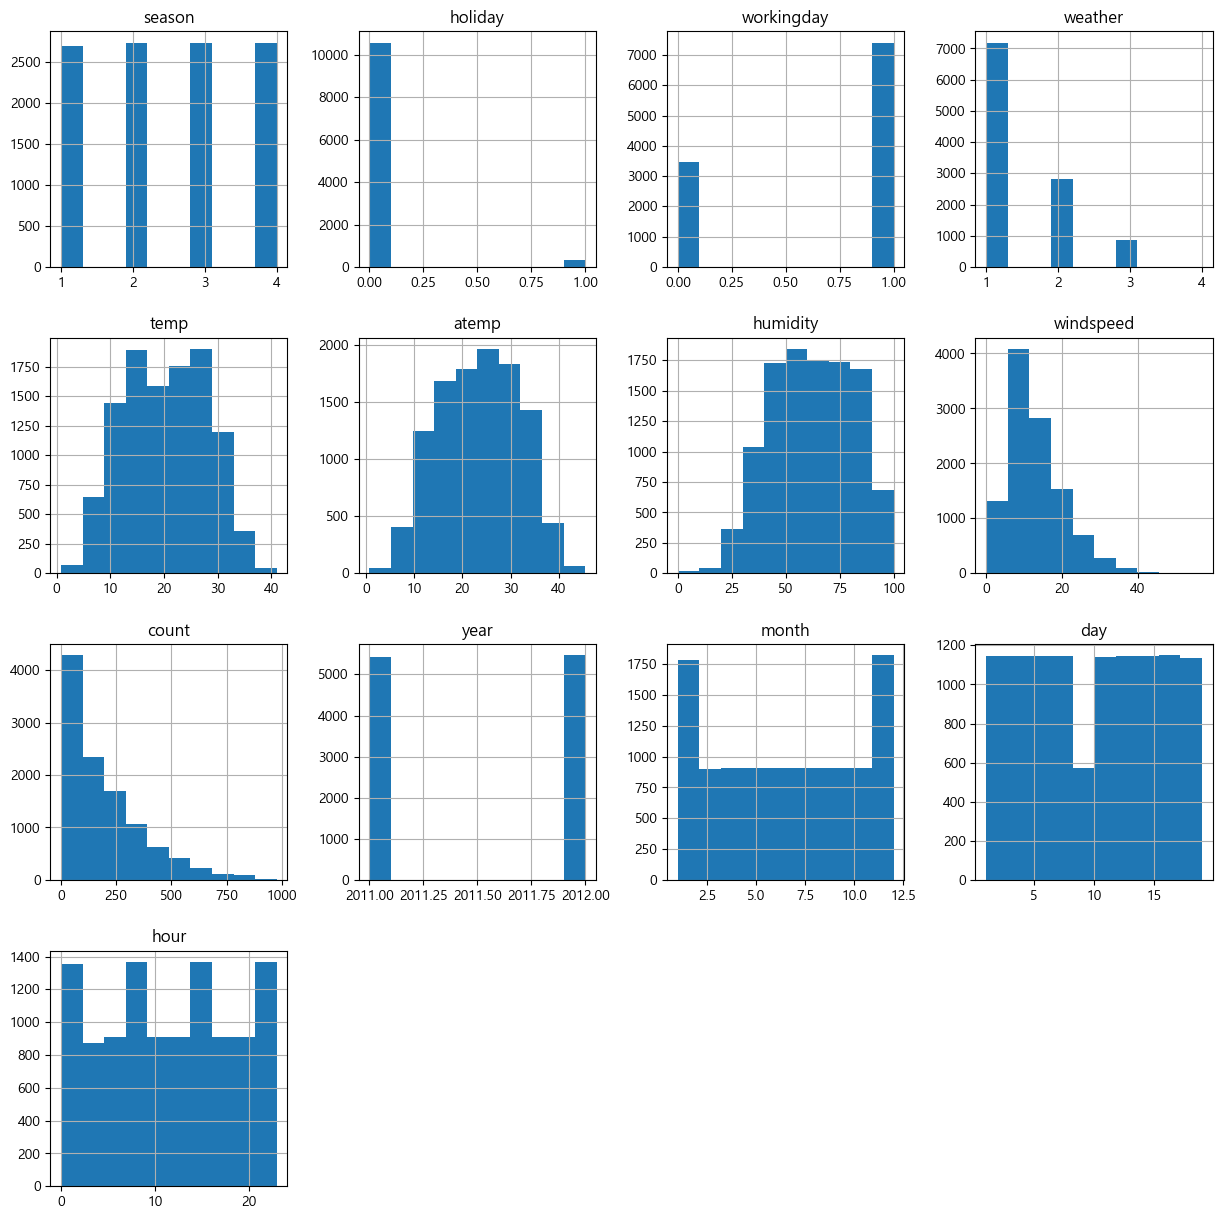

In [8]:
df_bike.hist( figsize = (15,15))
plt.show()

## 변수 선택

## 스케일링 수행

### 변환용 데이터프레임 별도 생성

In [31]:
df_bike2 = df_bike.copy()

### Log Transform

In [36]:
df_bike2['count'] = np.log1p(df_bike2['count'])

# df_bike2['windspeed'] = np.log1p(df_bike2['windspeed'])

### Standard Scaled

## 원핫인코딩

- 무조건 사용해야하는 방식은 아니다.
- 원핫인코딩은 경우에 따라서 다중공선성을 비정상적으로 크게 만들 수 있다.

# 회귀분석 - statsmodels 패키지

## x, y 변수 지정 및 데이터셋 분할

In [37]:
y = df_bike2['count']
x = df_bike2.drop(['count'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3,
                                                     random_state = 0)

## 회귀 모델 생성 및 적합

In [38]:
x_train = add_constant(x_train)
x_test = add_constant(x_test)

model = OLS( y_train, x_train)
 
fit_model = model.fit()

print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     600.7
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:08:33   Log-Likelihood:                -10935.
No. Observations:                7620   AIC:                         2.190e+04
Df Residuals:                    7607   BIC:                         2.199e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -838.8616     47.175    -17.782      0.0

In [39]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = x_train.columns
VIF['VIF factor'] = [ variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1]) ]

VIF.round(2)

,features,VIF factor
0,const,16391534.83
1,season,18.23
2,holiday,1.09
3,workingday,1.07
4,weather,1.26
5,temp,33.71
6,atemp,33.72
7,humidity,1.56
8,windspeed,1.21
9,year,1.01


In [40]:
y_pred = fit_model.predict(x_test)

mean_squared_error(y_test, y_pred, squared = False)

1.016826598200315

In [41]:
y_pred = fit_model.predict(x_test)

y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)

mean_squared_error(y_test, y_pred, squared = False)

162.59426809004665

## x, y 변수 지정 및 데이터셋 분할

In [18]:
y = df_bike2['count']
x = df_bike2.drop(['count', 'season', 'holiday', 'weather', 'temp', 'day'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3,
                                                     random_state = 0)

## 회귀 모델 생성 및 적합

In [19]:
x_train = add_constant(x_train)
x_test = add_constant(x_test)

model = OLS( y_train, x_train)
 
fit_model = model.fit()

print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     1029.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:49:57   Log-Likelihood:                -8269.6
No. Observations:                7620   AIC:                         1.656e+04
Df Residuals:                    7612   BIC:                         1.661e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.008     -0.264      0.7

In [20]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = x_train.columns
VIF['VIF factor'] = [ variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1]) ]

VIF.round(2)

,features,VIF factor
0,const,1.00
1,workingday,1.00
2,atemp,1.11
3,humidity,1.24
4,windspeed,1.14
5,year,1.01
6,month,1.14
7,hour,1.11


In [21]:
y_pred = fit_model.predict(x_test)

mean_squared_error(y_test, y_pred, squared = False)

0.7163912294691109

In [22]:
y_pred = fit_model.predict(x_test)

y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)

mean_squared_error(y_test, y_pred, squared = False)

0.8754683112706791

# [ 참고 ] `cross_val_score()` 에 사용가능한 scores 인자 확인

- `SCORERS.keys()` 실행

In [24]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei